In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd "/content/drive/MyDrive/pre_onboarding"

/content/drive/MyDrive/pre_onboarding


In [ ]:
df_pretest_data = pd.read_csv("pretest_data.csv")

In [ ]:
df_pretest_data

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
0,V-0db,CH49ta0,2021-07-01,Entertainment,PT8M20S,SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...,BTS performs their hit songs ‘Dynamite’ and ‘B...,2021-07-03,2021-07-04,13,...,792,1014,10373,10720,1080000,1080000,685992413,687485021,5947,5950
1,V-1XL,CHZVD--,2021-06-24,Entertainment,PT9M17S,치킨불냉면|치킨|불냉면|냉면,영상에 나오는 캐릭터의 이름은 파도비 입니다. 고양이가 아니라 파란 도깨비입니다. ...,2021-06-26,2021-06-27,28,...,121,154,1083,1173,627000,628000,75327083,75685030,70,70
2,V-4fa,CH9w-h_,2021-07-17,Entertainment,PT7M39S,NaN,"거세 구형, 성 충동 제거를 위한 엄벌 치료 VS 인권 보호해야고민 끝에 내린 강요...",2021-07-19,2021-07-22,1,...,162,233,696,1006,5750000,5750000,5424167911,5431617741,34270,34341
3,V-5ip,CHUQVGX,2021-06-02,Sports,PT6M40S,News Network|SBS SPORTSMUG|SPORTSMUG|스포츠머그|축구|...,세계 최초 9회 연속 올림픽 본선 진출! 그동안 한국 축구의 역사를 써내려 간 올림...,2021-06-04,2021-06-04,18,...,30,30,416,416,94200,94200,71160125,71160125,224,224
4,V-5jn,CHhI3EX,2021-07-06,Sports,PT11M27S,이천수|심판도전기|축구심판,찾아 뵐 심판분들이 이제 18명정도 남았네요,2021-07-08,2021-07-09,11,...,112,143,687,772,47600,49200,6993451,7607123,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,VzwuB,CH69uMh,2021-05-09,Comedy,PT2M34S,아프리카tv|봉준|와꾸대장봉준|BJ|컨텐츠|클립,BJ봉준입니다 저는 2021년 5월 10일 새벽 1시경 동료BJ들과 방송을 진행하던...,2021-05-11,2021-05-14,2,...,22830,42024,19228,28591,1010000,1000000,790006060,792406169,7659,7658
2640,VzxuL,CHhbE5O,2021-07-29,Comedy,PT6M39S,장삐쭈|삐쭈|ㅋㅋㅋ|삐쮸|장삐쮸|병맛더빙|더빙|웃긴동영상|꿀잼|신병|장삐쭈 단편선|...,"스튜디오 장삐쭈장삐쭈, 정영준, 안류천, 포포, 윤성원, 허혜원, 정대준, 지정민,...",2021-07-31,2021-07-31,1,...,558,558,18125,18125,2920000,2920000,1280502681,1280502681,363,363
2641,VzygR,CHO4RG1,2021-04-20,Science & Technology,PT11M45S,아이패드 프로|아이패드 프로5|아이패드 프로 5세대|신형 아이맥|아이맥|iMac|에...,"애플 봄 스페셜 이벤트를 통해서 공개된 아이패드 프로 5세대, 신형 아이맥, 에어태...",2021-04-22,2021-04-22,32,...,46,46,438,438,73100,73100,28123608,28123608,1139,1139
2642,Vzz6W,CHYeeEw,2021-04-26,Entertainment,PT11M27S,고요 속의 외침|뽕숭아학당|슬기로운캠핑생활|아는형님|미스터트롯|임영웅|영탁|장민호|...,비빈 닭↘고↗기 부터이진관 덕후까지레전드 꿀잼!!#뽕숭아학당 #미스터트롯 #고요속의...,2021-04-28,2021-04-29,20,...,67,82,230,281,298000,299000,139692013,140182861,461,464


## Null값, 중복 체크
제공받은 데이터셋에 오류가 있는지 확인하기 위해 기본적인 결측치와 중복 체크를 진행하였다.

In [ ]:
df_pretest_data.isnull().sum()

video_id                      0
channel_id                    0
published_date                0
category_name                 0
duration                      0
tags                        370
description                  40
on_trending_date              0
off_trending_date             0
on_rank                       0
off_rank                      0
on_views                      0
off_views                     0
on_likes                      0
off_likes                     0
on_dislikes                   0
off_dislikes                  0
on_comments                   0
off_comments                  0
on_channel_subscribers        0
off_channel_subscribers       0
on_channel_total_views        0
off_channel_total_views       0
on_channel_total_videos       0
off_channel_total_videos      0
dtype: int64

Null값이 들어있는 column이 tags, description 두 개인데, 이 둘은 영상에 따라 없을 수 있는 정보이므로 굳이 null값 처리를 할 필요는 없다고 판단함.

In [ ]:
df_pretest_data.loc[:, 'channel_id':].value_counts(dropna=False)

channel_id  published_date  category_name    duration  tags                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        description                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

value_count 길이가 dataframe row 수와 같으므로 중복된 데이터도 없다.

이를 통해 제공받은 분석 데이터셋에 오류가 없는 것으로 결론 내리고 아래 문제를 진행하였다.

## 날짜 데이터를 datetime 타입으로 변경

뒤에 진행할 월별, 주별 데이터 조회를 위해, 날짜 데이터들이 datetime 타입으로 만들어주고, 날짜 데이터의 범위가 어떻게 되는지 확인하고자 한다.

In [134]:
df_pretest_data.dtypes

video_id                    object
channel_id                  object
published_date              object
category_name               object
duration                    object
tags                        object
description                 object
on_trending_date            object
off_trending_date           object
on_rank                      int64
off_rank                     int64
on_views                     int64
off_views                    int64
on_likes                     int64
off_likes                    int64
on_dislikes                  int64
off_dislikes                 int64
on_comments                  int64
off_comments                 int64
on_channel_subscribers       int64
off_channel_subscribers      int64
on_channel_total_views       int64
off_channel_total_views      int64
on_channel_total_videos      int64
off_channel_total_videos     int64
dtype: object

현재 'YY-mm-dd' 형태의 데이터이지만, data type이 object인 column으로 'published_date', 'on_trending_date', 'off_trending_date' 이 있다. 이를 datetime type으로 변환한다.

In [137]:
df_pretest_data['published_date'] = pd.to_datetime(df_pretest_data['published_date'], format='%Y-%m-%d')
df_pretest_data['on_trending_date'] = pd.to_datetime(df_pretest_data['on_trending_date'], format='%Y-%m-%d')
df_pretest_data['off_trending_date'] = pd.to_datetime(df_pretest_data['off_trending_date'], format='%Y-%m-%d')

In [138]:
df_pretest_data.dtypes

video_id                            object
channel_id                          object
published_date              datetime64[ns]
category_name                       object
duration                            object
tags                                object
description                         object
on_trending_date            datetime64[ns]
off_trending_date           datetime64[ns]
on_rank                              int64
off_rank                             int64
on_views                             int64
off_views                            int64
on_likes                             int64
off_likes                            int64
on_dislikes                          int64
off_dislikes                         int64
on_comments                          int64
off_comments                         int64
on_channel_subscribers               int64
off_channel_subscribers              int64
on_channel_total_views               int64
off_channel_total_views              int64
on_channel_

In [142]:
df_pretest_data['published_date'].dt.month.

0       7
1       6
2       7
3       6
4       7
       ..
2639    5
2640    7
2641    4
2642    4
2643    6
Name: published_date, Length: 2644, dtype: int64

## 1. 전체기간 카테고리 -> 채널 -> 비디오 개수 시각화

In [ ]:
num_category_name = len(df_pretest_data['category_name'].unique())

array(['Entertainment', 'Sports', 'Music', 'People & Blogs',
       'Science & Technology', 'Education', 'Howto & Style',
       'News & Politics', 'Gaming', 'Comedy', 'Pets & Animals',
       'Travel & Events', 'Film & Animation', 'Autos & Vehicles',
       'Nonprofits & Activism'], dtype=object)

In [ ]:
'''
1. 전체기간 카테고리 -> 채널 -> 비디오 개수 시각화

카테고리 위에 채널, 채널 위에 비디오 개수를 row로 놓고 막대 그래프로 시각화.
막대그래프를 사용해야 다른 카테고리, 채널 간의 비교가 될듯
'''

'''
subplot(1,n) -> 카테고리 수 만큼 subplot을 만들고 subtitle을 카테고리 이름으로 한다.
그 위에 row를 채널 이름으로, column을 비디오 수로 단순 시각화하면 될듯하다
단, 비디오 수의 경우 같은 채널 같은 카테고리이면서 여러 인기 동영상이 올라온 경우를 체크하자
위의 말이 아니라, 단순 2600개 중 한 개의 데이터를 하나의 비디오 수로 인식하고, 이를 세로로 두는 게 맞을수도 있다(세로 길이가 끽해야 5가 될수도)

*** pie chart(원형 차트)가 좋을수도!!
'''
df_category_channel = df_pretest_data.loc[:, ['category_name', 'channel_id']]
df_category_channel.value_counts()

In [ ]:
df_category_channel[df_category_channel['category_name']=='Entertainment'].value_counts()

category_name  channel_id
Entertainment  CHQ2O-i       17
               CHiwQRG       14
               CHlzB2i       14
               CHaKod3       11
               CHx6jsZ       10
                             ..
               CHOtCBu        1
               CHOzWaj        1
               CHPECLB        1
               CHPKNKl        1
               CHzt24f        1
Length: 312, dtype: int64

In [ ]:
# 연습용
df = df_pretest_data.groupby('category_name')['channel_id'].value_counts().sort_index()

Index(['CH-BqPA', 'CH-Jblc', 'CH-VOS6', 'CH-VbFg', 'CH-giR4', 'CH0PsUG',
       'CH0VR2v', 'CH1-lwA', 'CH12YJZ', 'CH18g7g',
       ...
       'CHxQXvv', 'CHxjERP', 'CHxmBxN', 'CHy-NrX', 'CHy-swB', 'CHy1fru',
       'CHybPxZ', 'CHybzQL', 'CHyozK5', 'CHzt24f'],
      dtype='object', name='channel_id', length=312)

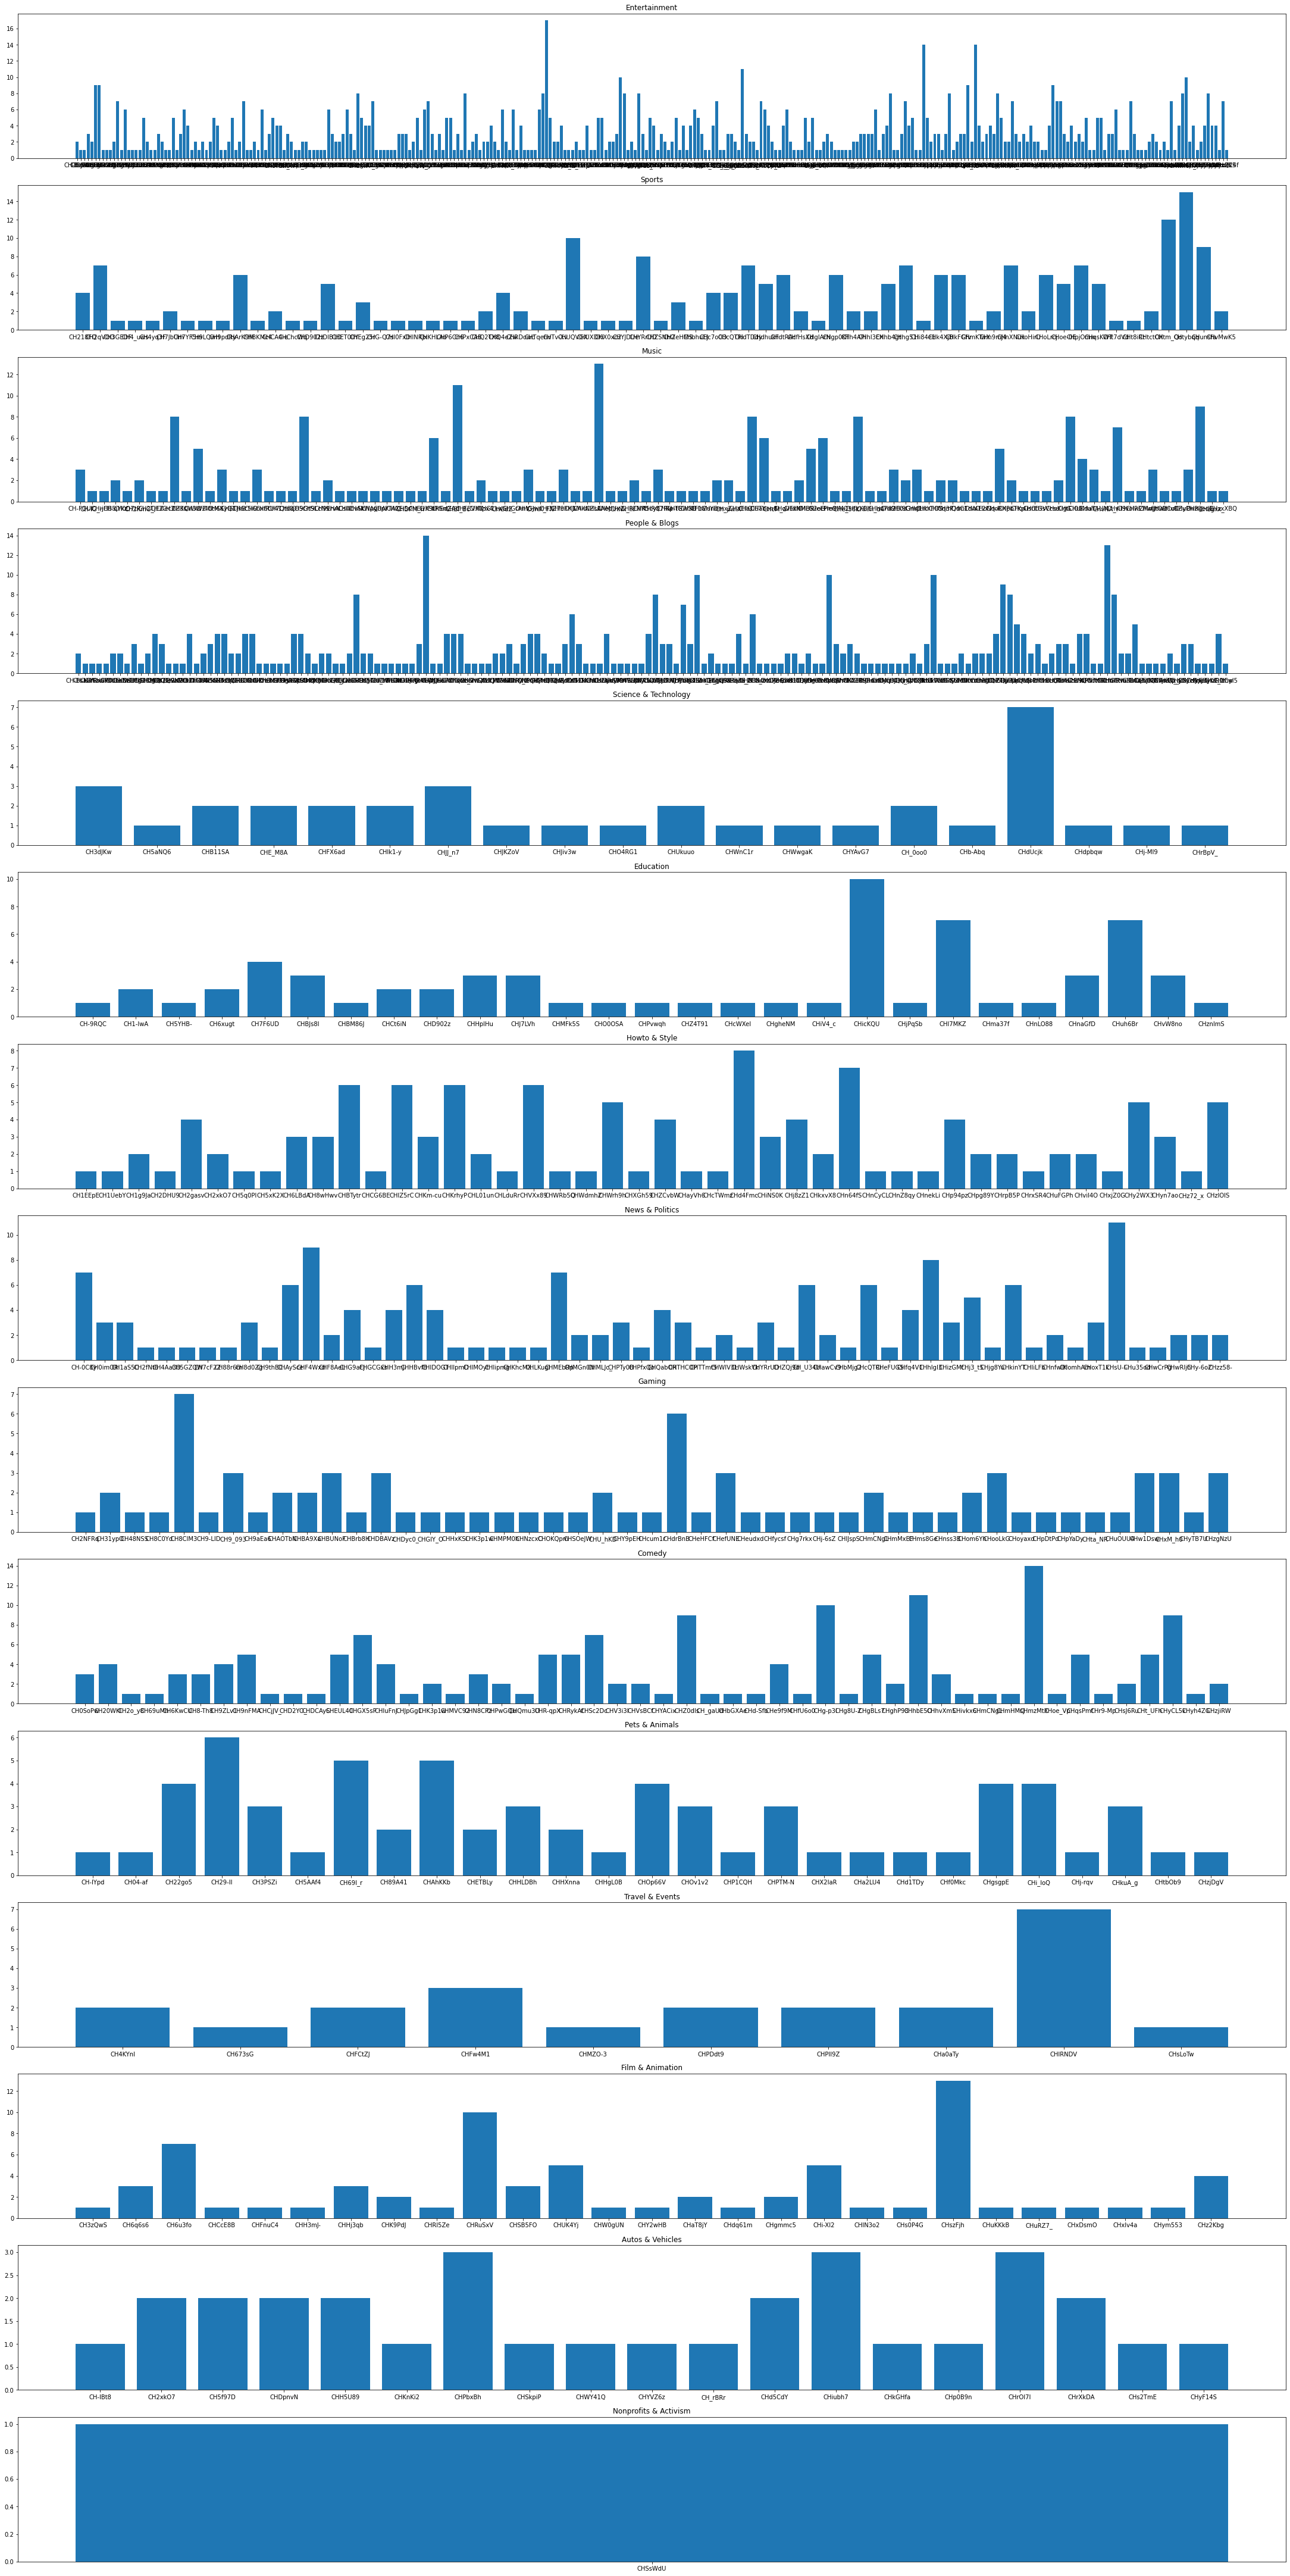

In [ ]:
fig, axes = plt.subplots(num_category_name, 1, figsize=(30,60), constrained_layout=True)

group = df_pretest_data.groupby('category_name')['channel_id'].value_counts().sort_index()
for i, cat_name in enumerate(df_pretest_data['category_name'].unique()):
  axes[i].set_title(cat_name)
  axes[i].bar(group[cat_name].index, group[cat_name])

plt.show()

## 2. 월별 카테고리 -> 채널 -> 비디오 개수 시각화

In [ ]:
'''
2. 월별 카테고리 -> 채널 -> 비디오 개수 시각화

1번과 똑같은 기법으로 접근하며 subplot 수만 늘려야하나?
Line plot을 사용할 수 있지 않을까?
'''

## 3. 월별 TOP 10 채널 (분류 기준은 비디오 개수)


0       7
1       6
2       7
3       6
4       7
       ..
2639    5
2640    7
2641    4
2642    4
2643    6
Name: published_date, Length: 2644, dtype: int64

## 4. 주별 TOP 5 채널 (분류 기준은 비디오 개수)


## 5. 월별 카테고리별 태그 키워드 순위

## Q2. 시청자의 호응도(engagement, ex: views, likes, dislikes, comments)를 파악할 수 있는, 인기 동영상 기준에 부합할 수 있는 새로운 지표를 개발하고, 이 지표를 이용하여 engagement와 상관관계가 있는지 설명하시오.